## First try

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_21949/3070937435.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['recency'].fillna(customer_data['recency'].mean(), inplace=True)
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_21949/3070937435.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

Pourcentage d'individus dans chaque cluster RFM (DBSCAN):
RFM_DBSCAN_Cluster
 0    96.597294
 1     1.623309
-1     1.331946
 2     0.280957
 3     0.166493
Name: proportion, dtype: float64
Pourcentage d'individus dans chaque cluster RFM+Review_Score (DBSCAN):
RFM_Review_DBSCAN_Cluster
 0    85.150884
 2    10.332986
-1     3.309053
 1     1.061394
 3     0.145682
Name: proportion, dtype: float64


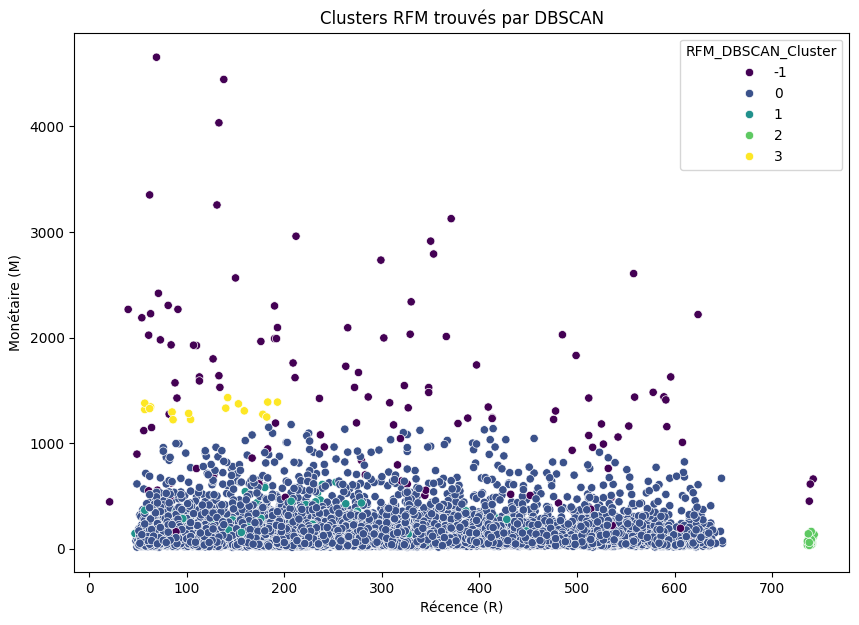

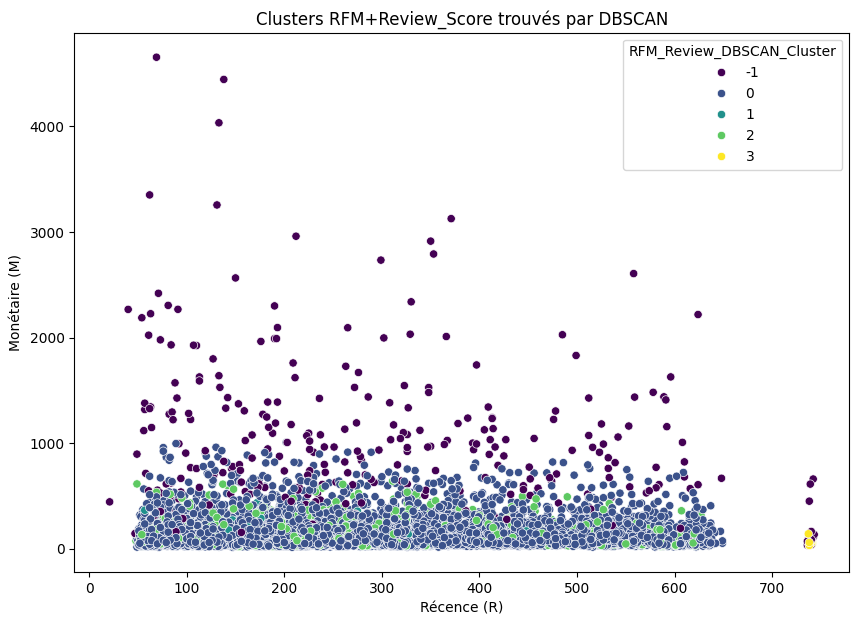

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Définir la date actuelle pour l'analyse RFM
current_date = datetime.strptime('2018-10-17', '%Y-%m-%d')

# Calculer la récence (nombre de jours depuis la dernière commande)
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'])
customer_data['recency'] = (current_date - customer_data['last_order']).dt.days

# Calculer la fréquence en utilisant la colonne 'connection_days'
customer_data['frequency'] = customer_data['connection_days']

# Calculer la valeur monétaire en utilisant la colonne 'total_spent'
customer_data['monetary'] = customer_data['total_spent']

# S'assurer que les colonnes sont de type numérique
customer_data['recency'] = pd.to_numeric(customer_data['recency'], errors='coerce')
customer_data['frequency'] = pd.to_numeric(customer_data['frequency'], errors='coerce')
customer_data['monetary'] = pd.to_numeric(customer_data['monetary'], errors='coerce')
customer_data['avg_review_score'] = pd.to_numeric(customer_data['avg_review_score'], errors='coerce')

# Traiter les valeurs manquantes en les remplaçant par la moyenne de la colonne
customer_data['recency'].fillna(customer_data['recency'].mean(), inplace=True)
customer_data['frequency'].fillna(customer_data['frequency'].mean(), inplace=True)
customer_data['monetary'].fillna(customer_data['monetary'].mean(), inplace=True)
customer_data['avg_review_score'].fillna(customer_data['avg_review_score'].mean(), inplace=True)

# Échantillonner les données (par exemple, 10% des données)
sampled_data = customer_data.sample(frac=0.1, random_state=42)

# Sélectionner les colonnes nécessaires pour le clustering
rfm_features = sampled_data[['recency', 'frequency', 'monetary']]
rfm_review_features = sampled_data[['recency', 'frequency', 'monetary', 'avg_review_score']]

def perform_dbscan_clustering(data, eps=0.5, min_samples=5):
    # Standard scaling
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Effectuer le clustering DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(data_scaled)
    
    return cluster_labels

# DBSCAN Clustering on RFM
rfm_dbscan_clusters = perform_dbscan_clustering(rfm_features, eps=0.5, min_samples=10)

# DBSCAN Clustering on RFM+Review_Score
rfm_review_dbscan_clusters = perform_dbscan_clustering(rfm_review_features, eps=0.5, min_samples=10)

# Ajouter les clusters aux données échantillonnées pour visualisation
sampled_data['RFM_DBSCAN_Cluster'] = rfm_dbscan_clusters
sampled_data['RFM_Review_DBSCAN_Cluster'] = rfm_review_dbscan_clusters

# Afficher les pourcentages d'individus dans chaque cluster pour RFM
rfm_dbscan_cluster_percentages = sampled_data['RFM_DBSCAN_Cluster'].value_counts(normalize=True) * 100
print(f'Pourcentage d\'individus dans chaque cluster RFM (DBSCAN):\n{rfm_dbscan_cluster_percentages}')

# Afficher les pourcentages d'individus dans chaque cluster pour RFM+Review_Score
rfm_review_dbscan_cluster_percentages = sampled_data['RFM_Review_DBSCAN_Cluster'].value_counts(normalize=True) * 100
print(f'Pourcentage d\'individus dans chaque cluster RFM+Review_Score (DBSCAN):\n{rfm_review_dbscan_cluster_percentages}')

# Visualiser les clusters RFM trouvés par DBSCAN
plt.figure(figsize=(10, 7))
sns.scatterplot(x='recency', y='monetary', hue='RFM_DBSCAN_Cluster', data=sampled_data, palette='viridis')
plt.title('Clusters RFM trouvés par DBSCAN')
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.show()

# Visualiser les clusters RFM+Review_Score trouvés par DBSCAN
plt.figure(figsize=(10, 7))
sns.scatterplot(x='recency', y='monetary', hue='RFM_Review_DBSCAN_Cluster', data=sampled_data, palette='viridis')
plt.title('Clusters RFM+Review_Score trouvés par DBSCAN')
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.show()

## Code pour Choisir \epsilon avec un k-distance plot

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_21949/263083626.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['recency'].fillna(customer_data['recency'].mean(), inplace=True)
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_21949/263083626.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

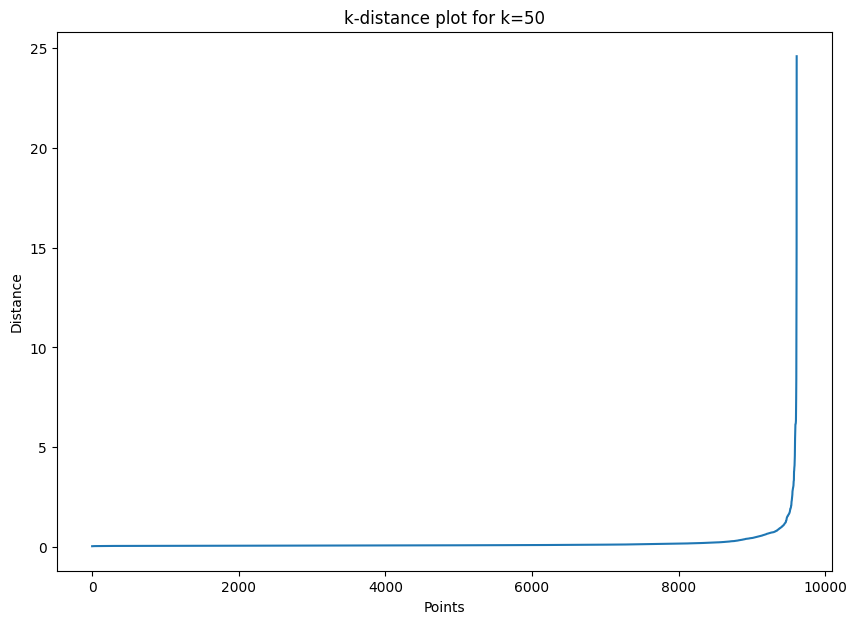

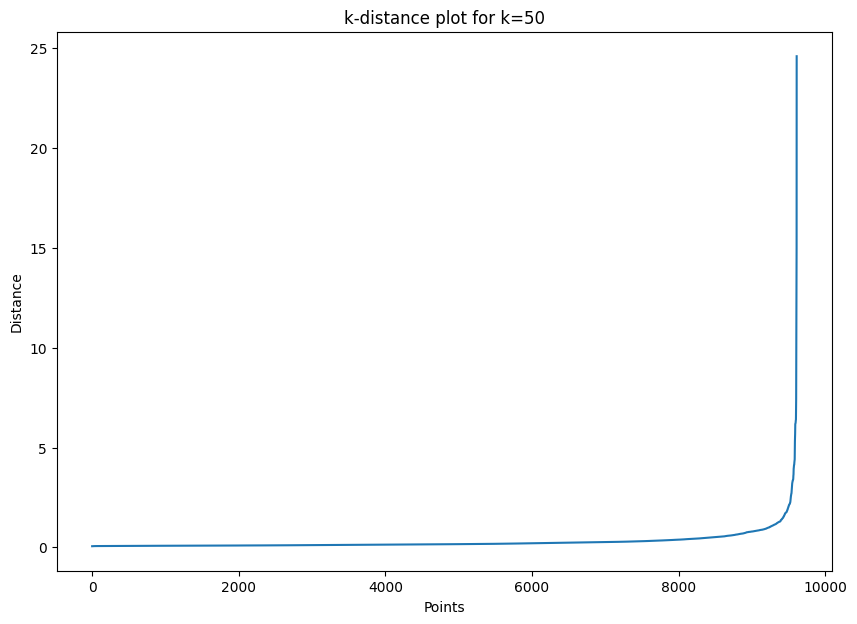

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Définir la date actuelle pour l'analyse RFM
current_date = datetime.strptime('2018-10-17', '%Y-%m-%d')

# Calculer la récence (nombre de jours depuis la dernière commande)
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'])
customer_data['recency'] = (current_date - customer_data['last_order']).dt.days

# Calculer la fréquence en utilisant la colonne 'connection_days'
customer_data['frequency'] = customer_data['connection_days']

# Calculer la valeur monétaire en utilisant la colonne 'total_spent'
customer_data['monetary'] = customer_data['total_spent']

# S'assurer que les colonnes sont de type numérique
customer_data['recency'] = pd.to_numeric(customer_data['recency'], errors='coerce')
customer_data['frequency'] = pd.to_numeric(customer_data['frequency'], errors='coerce')
customer_data['monetary'] = pd.to_numeric(customer_data['monetary'], errors='coerce')
customer_data['avg_review_score'] = pd.to_numeric(customer_data['avg_review_score'], errors='coerce')

# Traiter les valeurs manquantes en les remplaçant par la moyenne de la colonne
customer_data['recency'].fillna(customer_data['recency'].mean(), inplace=True)
customer_data['frequency'].fillna(customer_data['frequency'].mean(), inplace=True)
customer_data['monetary'].fillna(customer_data['monetary'].mean(), inplace=True)
customer_data['avg_review_score'].fillna(customer_data['avg_review_score'].mean(), inplace=True)

# Échantillonner les données (par exemple, 10% des données)
sampled_data = customer_data.sample(frac=0.1, random_state=42)

# Sélectionner les colonnes nécessaires pour le clustering
rfm_features = sampled_data[['recency', 'frequency', 'monetary']]
rfm_review_features = sampled_data[['recency', 'frequency', 'monetary', 'avg_review_score']]

# Standard scaling
scaler = StandardScaler()
rfm_features_scaled = scaler.fit_transform(rfm_features)
rfm_review_features_scaled = scaler.fit_transform(rfm_review_features)

# Choisir epsilon avec le k-distance plot
def plot_k_distance(data, k):
    nearest_neighbors = NearestNeighbors(n_neighbors=k)
    neighbors = nearest_neighbors.fit(data)
    distances, indices = neighbors.kneighbors(data)
    distances = np.sort(distances[:, k-1], axis=0)
    plt.figure(figsize=(10, 7))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel('Distance')
    plt.title(f'k-distance plot for k={k}')
    plt.show()

# Plot k-distance pour les données RFM
plot_k_distance(rfm_features_scaled, 50)

# Plot k-distance pour les données RFM+Review_Score
plot_k_distance(rfm_review_features_scaled, 50)

## Code Mis à Jour pour Clustering avec DBSCAN et Choix des Paramètres

/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_21949/399452246.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['recency'].fillna(customer_data['recency'].mean(), inplace=True)
/var/folders/17/7v9_fz593_xfss9zy0542f940000gn/T/ipykernel_21949/399452246.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

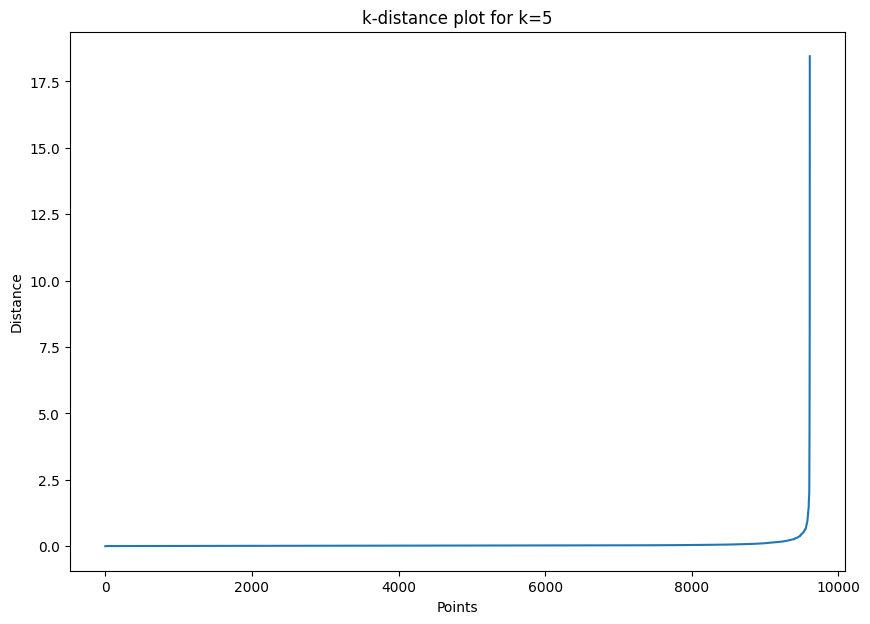

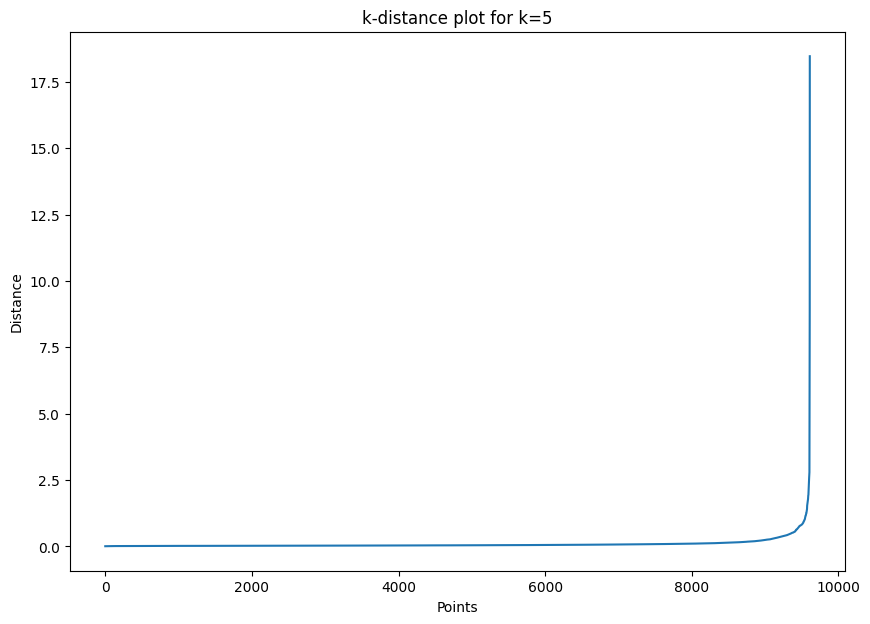

Pourcentage d'individus dans chaque cluster RFM (DBSCAN):
RFM_DBSCAN_Cluster
 0    97.013528
 1     1.727367
-1     0.676379
 2     0.280957
 5     0.083247
 3     0.072841
 6     0.052029
 4     0.052029
 7     0.041623
Name: proportion, dtype: float64
Pourcentage d'individus dans chaque cluster RFM+Review_Score (DBSCAN):
RFM_Review_DBSCAN_Cluster
 0    85.837669
 2    10.405827
-1     1.945890
 1     1.227888
 3     0.145682
 4     0.135276
 9     0.104058
 7     0.072841
 5     0.062435
 6     0.052029
 8     0.010406
Name: proportion, dtype: float64


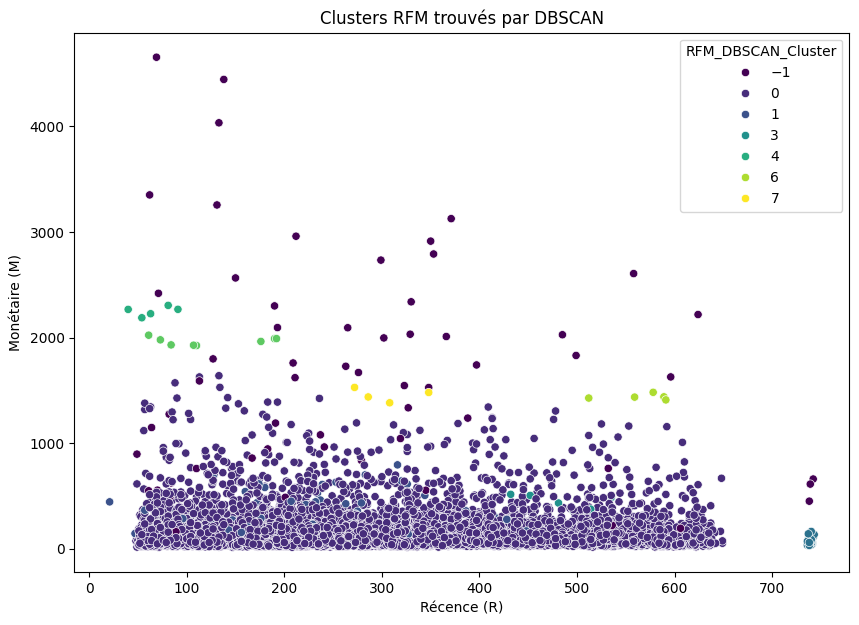

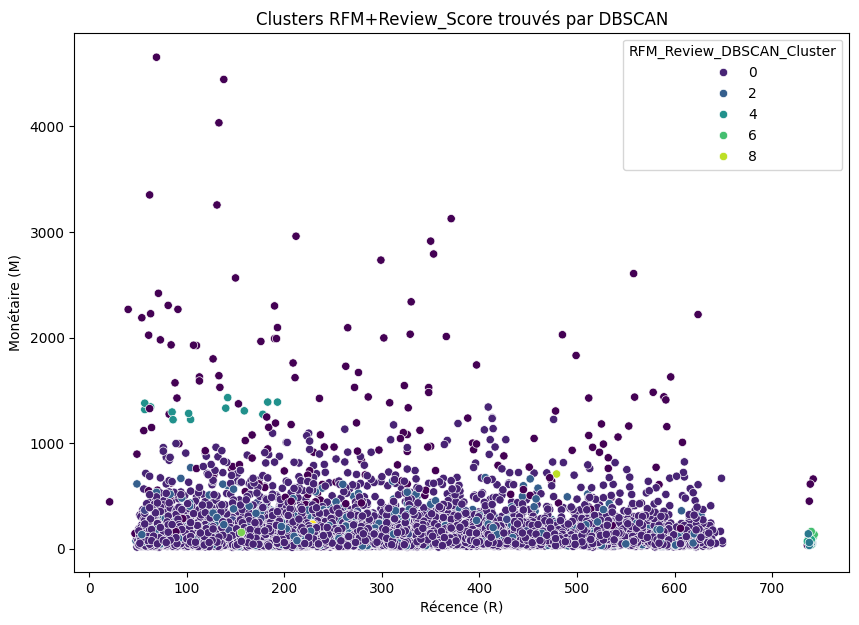

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Définir la date actuelle pour l'analyse RFM
current_date = datetime.strptime('2018-10-17', '%Y-%m-%d')

# Calculer la récence (nombre de jours depuis la dernière commande)
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'])
customer_data['recency'] = (current_date - customer_data['last_order']).dt.days

# Calculer la fréquence en utilisant la colonne 'connection_days'
customer_data['frequency'] = customer_data['connection_days']

# Calculer la valeur monétaire en utilisant la colonne 'total_spent'
customer_data['monetary'] = customer_data['total_spent']

# S'assurer que les colonnes sont de type numérique
customer_data['recency'] = pd.to_numeric(customer_data['recency'], errors='coerce')
customer_data['frequency'] = pd.to_numeric(customer_data['frequency'], errors='coerce')
customer_data['monetary'] = pd.to_numeric(customer_data['monetary'], errors='coerce')
customer_data['avg_review_score'] = pd.to_numeric(customer_data['avg_review_score'], errors='coerce')

# Traiter les valeurs manquantes en les remplaçant par la moyenne de la colonne
customer_data['recency'].fillna(customer_data['recency'].mean(), inplace=True)
customer_data['frequency'].fillna(customer_data['frequency'].mean(), inplace=True)
customer_data['monetary'].fillna(customer_data['monetary'].mean(), inplace=True)
customer_data['avg_review_score'].fillna(customer_data['avg_review_score'].mean(), inplace=True)

# Échantillonner les données (par exemple, 10% des données)
sampled_data = customer_data.sample(frac=0.1, random_state=42)

# Sélectionner les colonnes nécessaires pour le clustering
rfm_features = sampled_data[['recency', 'frequency', 'monetary']]
rfm_review_features = sampled_data[['recency', 'frequency', 'monetary', 'avg_review_score']]

# Standard scaling
scaler = StandardScaler()
rfm_features_scaled = scaler.fit_transform(rfm_features)
rfm_review_features_scaled = scaler.fit_transform(rfm_review_features)

# Choisir epsilon avec le k-distance plot
def plot_k_distance(data, k):
    nearest_neighbors = NearestNeighbors(n_neighbors=k)
    neighbors = nearest_neighbors.fit(data)
    distances, indices = neighbors.kneighbors(data)
    distances = np.sort(distances[:, k-1], axis=0)
    plt.figure(figsize=(10, 7))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel('Distance')
    plt.title(f'k-distance plot for k={k}')
    plt.show()

# Plot k-distance pour les données RFM
plot_k_distance(rfm_features_scaled, 5)

# Plot k-distance pour les données RFM+Review_Score
plot_k_distance(rfm_review_features_scaled, 5)

# Après avoir déterminé epsilon à partir des k-distance plots, vous pouvez utiliser DBSCAN pour le clustering
epsilon_rfm = 0.5  # Remplacez par la valeur appropriée trouvée
epsilon_rfm_review = 0.5  # Remplacez par la valeur appropriée trouvée

# DBSCAN Clustering on RFM
rfm_dbscan_clusters = DBSCAN(eps=epsilon_rfm, min_samples=5).fit_predict(rfm_features_scaled)

# DBSCAN Clustering on RFM+Review_Score
rfm_review_dbscan_clusters = DBSCAN(eps=epsilon_rfm_review, min_samples=5).fit_predict(rfm_review_features_scaled)

# Ajouter les clusters aux données échantillonnées pour visualisation
sampled_data['RFM_DBSCAN_Cluster'] = rfm_dbscan_clusters
sampled_data['RFM_Review_DBSCAN_Cluster'] = rfm_review_dbscan_clusters

# Afficher les pourcentages d'individus dans chaque cluster pour RFM
rfm_dbscan_cluster_percentages = sampled_data['RFM_DBSCAN_Cluster'].value_counts(normalize=True) * 100
print(f'Pourcentage d\'individus dans chaque cluster RFM (DBSCAN):\n{rfm_dbscan_cluster_percentages}')

# Afficher les pourcentages d'individus dans chaque cluster pour RFM+Review_Score
rfm_review_dbscan_cluster_percentages = sampled_data['RFM_Review_DBSCAN_Cluster'].value_counts(normalize=True) * 100
print(f'Pourcentage d\'individus dans chaque cluster RFM+Review_Score (DBSCAN):\n{rfm_review_dbscan_cluster_percentages}')

# Visualiser les clusters RFM trouvés par DBSCAN
plt.figure(figsize=(10, 7))
sns.scatterplot(x='recency', y='monetary', hue='RFM_DBSCAN_Cluster', data=sampled_data, palette='viridis')
plt.title('Clusters RFM trouvés par DBSCAN')
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.show()

# Visualiser les clusters RFM+Review_Score trouvés par DBSCAN
plt.figure(figsize=(10, 7))
sns.scatterplot(x='recency', y='monetary', hue='RFM_Review_DBSCAN_Cluster', data=sampled_data, palette='viridis')
plt.title('Clusters RFM+Review_Score trouvés par DBSCAN')
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.show()

## Code Mis à Jour pour Clustering avec DBSCAN et Choix des Paramètres V2

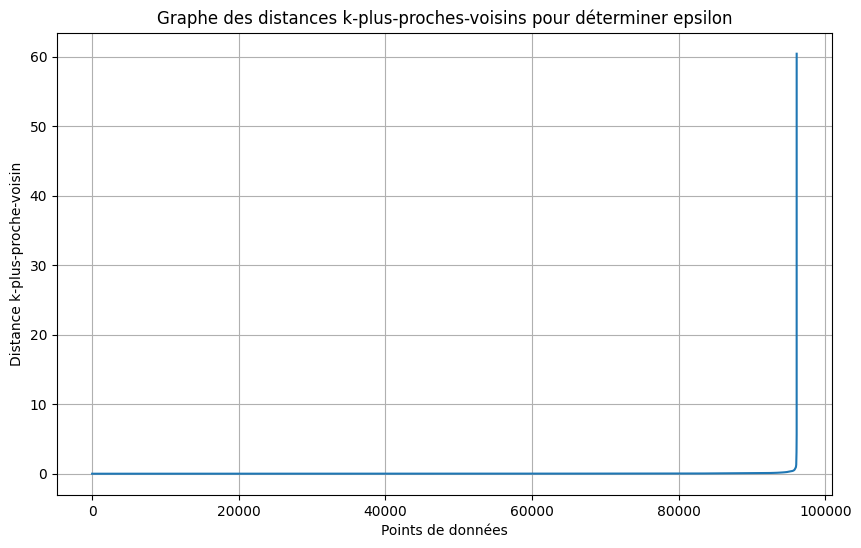

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Assurez-vous que les dates sont en format datetime
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'], errors='coerce')

# Fonction pour préparer les données RFM + review_score
def prepare_data(data):
    current_date = data['last_order'].max()
    data['last_order'] = pd.to_datetime(data['last_order'])
    data['recency'] = (current_date - data['last_order']).dt.days
    data['frequency'] = data['connection_days']
    data['monetary'] = data['total_spent']
    features = data[['recency', 'frequency', 'monetary', 'avg_review_score']]
    return features

# Préparer les données
features = prepare_data(customer_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
features = features.fillna(features.mean())

# Standard scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calculer les distances des k plus proches voisins
k = 4
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(features_scaled)
distances, indices = neighbors.kneighbors(features_scaled)

# Tracer le graphe des distances k-plus-proches-voisins
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points de données')
plt.ylabel('Distance k-plus-proche-voisin')
plt.title('Graphe des distances k-plus-proches-voisins pour déterminer epsilon')
plt.grid(True)
plt.show()

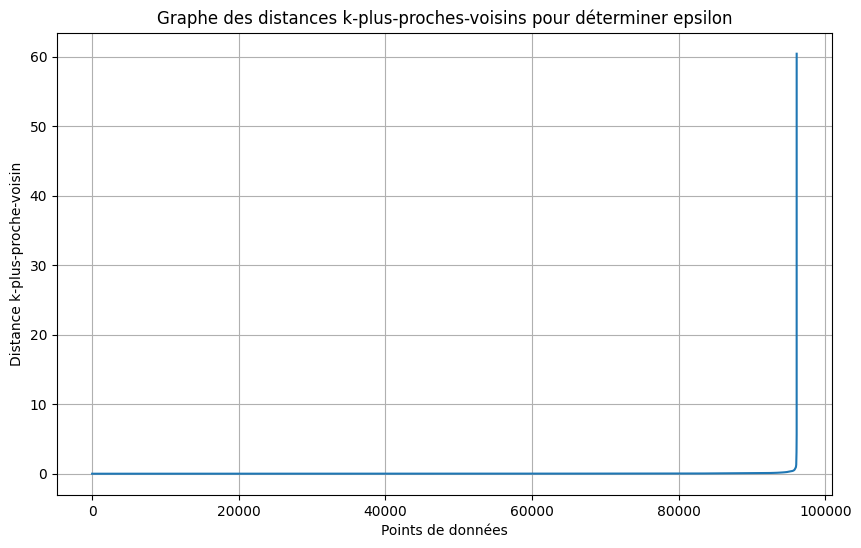

Distances autour de l'index 90000:
[0.06648505 0.06648505 0.06648664 0.06650234 0.06650542 0.06650542
 0.06652589 0.06652745 0.06653713 0.06654503 0.06654922 0.06655713
 0.06655955 0.06656127 0.06656127 0.0665795  0.06658065 0.06658396
 0.06660747 0.06661047]


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Assurez-vous que les dates sont en format datetime
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'], errors='coerce')

# Fonction pour préparer les données RFM + review_score
def prepare_data(data):
    current_date = data['last_order'].max()
    data['last_order'] = pd.to_datetime(data['last_order'])
    data['recency'] = (current_date - data['last_order']).dt.days
    data['frequency'] = data['connection_days']
    data['monetary'] = data['total_spent']
    features = data[['recency', 'frequency', 'monetary', 'avg_review_score']]
    return features

# Préparer les données
features = prepare_data(customer_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
features = features.fillna(features.mean())

# Standard scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calculer les distances des k plus proches voisins
k = 4
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(features_scaled)
distances, indices = neighbors.kneighbors(features_scaled)

# Tracer le graphe des distances k-plus-proches-voisins
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points de données')
plt.ylabel('Distance k-plus-proche-voisin')
plt.title('Graphe des distances k-plus-proches-voisins pour déterminer epsilon')
plt.grid(True)
plt.show()

# Examiner les valeurs autour de l'index 90000
print("Distances autour de l'index 90000:")
print(distances[89990:90010])

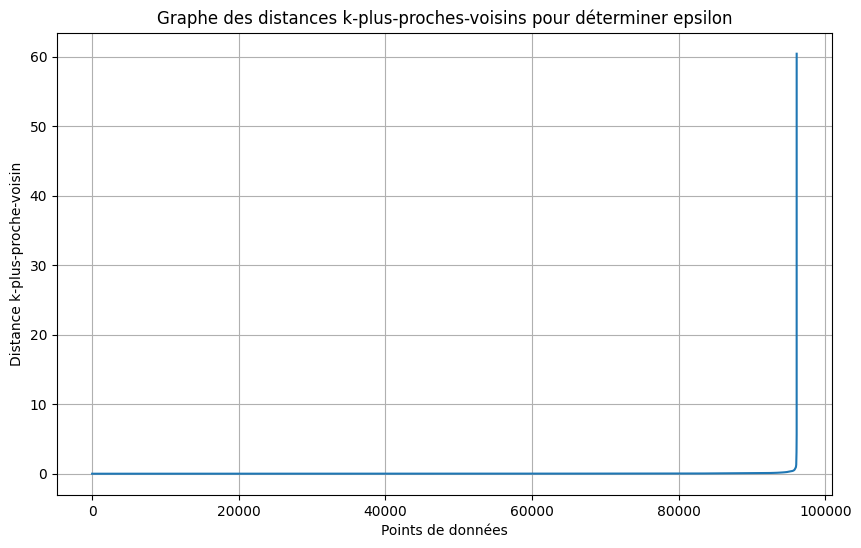

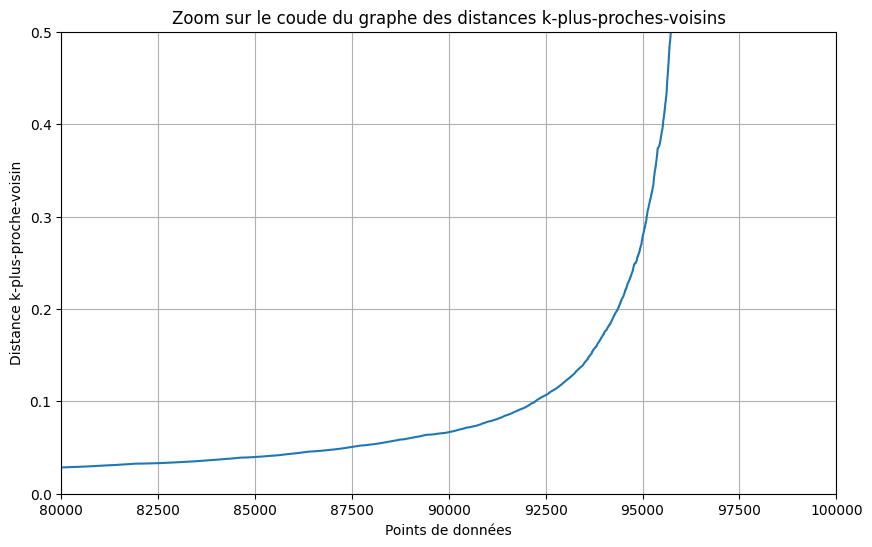

Distances autour de l'index 90000:
[0.06648505 0.06648505 0.06648664 0.06650234 0.06650542 0.06650542
 0.06652589 0.06652745 0.06653713 0.06654503 0.06654922 0.06655713
 0.06655955 0.06656127 0.06656127 0.0665795  0.06658065 0.06658396
 0.06660747 0.06661047]


In [10]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Assurez-vous que les dates sont en format datetime
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'], errors='coerce')

# Fonction pour préparer les données RFM + review_score
def prepare_data(data):
    current_date = data['last_order'].max()
    data['last_order'] = pd.to_datetime(data['last_order'])
    data['recency'] = (current_date - data['last_order']).dt.days
    data['frequency'] = data['connection_days']
    data['monetary'] = data['total_spent']
    features = data[['recency', 'frequency', 'monetary', 'avg_review_score']]
    return features

# Préparer les données
features = prepare_data(customer_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
features = features.fillna(features.mean())

# Standard scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calculer les distances des k plus proches voisins
k = 4
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(features_scaled)
distances, indices = neighbors.kneighbors(features_scaled)

# Tracer le graphe des distances k-plus-proches-voisins
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points de données')
plt.ylabel('Distance k-plus-proche-voisin')
plt.title('Graphe des distances k-plus-proches-voisins pour déterminer epsilon')
plt.grid(True)
plt.show()

# Zoom sur le coude
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlim(80000, 100000)  # Zoom sur l'index autour de 90000
plt.ylim(0, .5)        # Ajustez les limites en fonction des valeurs observées
plt.xlabel('Points de données')
plt.ylabel('Distance k-plus-proche-voisin')
plt.title('Zoom sur le coude du graphe des distances k-plus-proches-voisins')
plt.grid(True)
plt.show()

# Examiner les valeurs autour de l'index 90000
print("Distances autour de l'index 90000:")
print(distances[89990:90010])

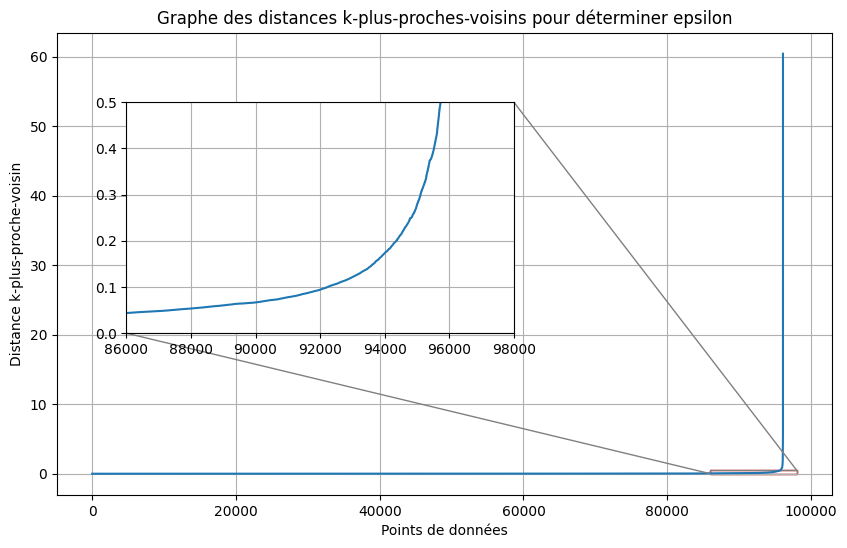

Distances autour de l'index 93750:
[0.15612343 0.15616302 0.15637183 0.15637183 0.15646325 0.15649228
 0.15651067 0.15651307 0.15655816 0.15662941 0.15664367 0.15669888
 0.15673898 0.15681886 0.15688003 0.15696155 0.15697654 0.15713643
 0.15715235 0.15721064]


In [33]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Assurez-vous que les dates sont en format datetime
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'], errors='coerce')

# Fonction pour préparer les données RFM + review_score
def prepare_data(data):
    current_date = data['last_order'].max()
    data['last_order'] = pd.to_datetime(data['last_order'])
    data['recency'] = (current_date - data['last_order']).dt.days
    data['frequency'] = data['connection_days']
    data['monetary'] = data['total_spent']
    features = data[['recency', 'frequency', 'monetary', 'avg_review_score']]
    return features

# Préparer les données
features = prepare_data(customer_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
features = features.fillna(features.mean())

# Standard scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calculer les distances des k plus proches voisins
k = 4
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(features_scaled)
distances, indices = neighbors.kneighbors(features_scaled)

# Tracer le graphe des distances k-plus-proches-voisins
distances = np.sort(distances[:, k-1], axis=0)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(distances)
ax.set_xlabel('Points de données')
ax.set_ylabel('Distance k-plus-proche-voisin')
ax.set_title('Graphe des distances k-plus-proches-voisins pour déterminer epsilon')
ax.grid(True)

# Ajouter un insert pour le zoom sur le coude
ax_inset = inset_axes(ax, width="50%", height="50%", loc='upper left', borderpad=5)
ax_inset.plot(distances)
ax_inset.set_xlim(86000, 98000)  # Zoom sur l'index autour de 90000
ax_inset.set_ylim(0, 0.5)         # Ajustez les limites en fonction des valeurs observées
# ax_inset.set_title('Zoom sur le coude')
ax_inset.grid(True)

# Ajouter un carré sur le graphique principal pour montrer la zone de zoom
rect = plt.Rectangle((86000, 0), 12000, 0.5, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Relier le carré et l'inset avec des lignes
mark_inset(ax, ax_inset, loc1=1, loc2=3, fc="none", ec="0.5")

plt.show()

# Examiner les valeurs autour de l'index 90000
print("Distances autour de l'index 93750:")
print(distances[93750-10:93750+10])

Cluster
0      52894
1      18331
3      10279
2       7455
4       2782
       ...  
122        4
130        4
67         4
105        4
128        3
Name: count, Length: 152, dtype: int64


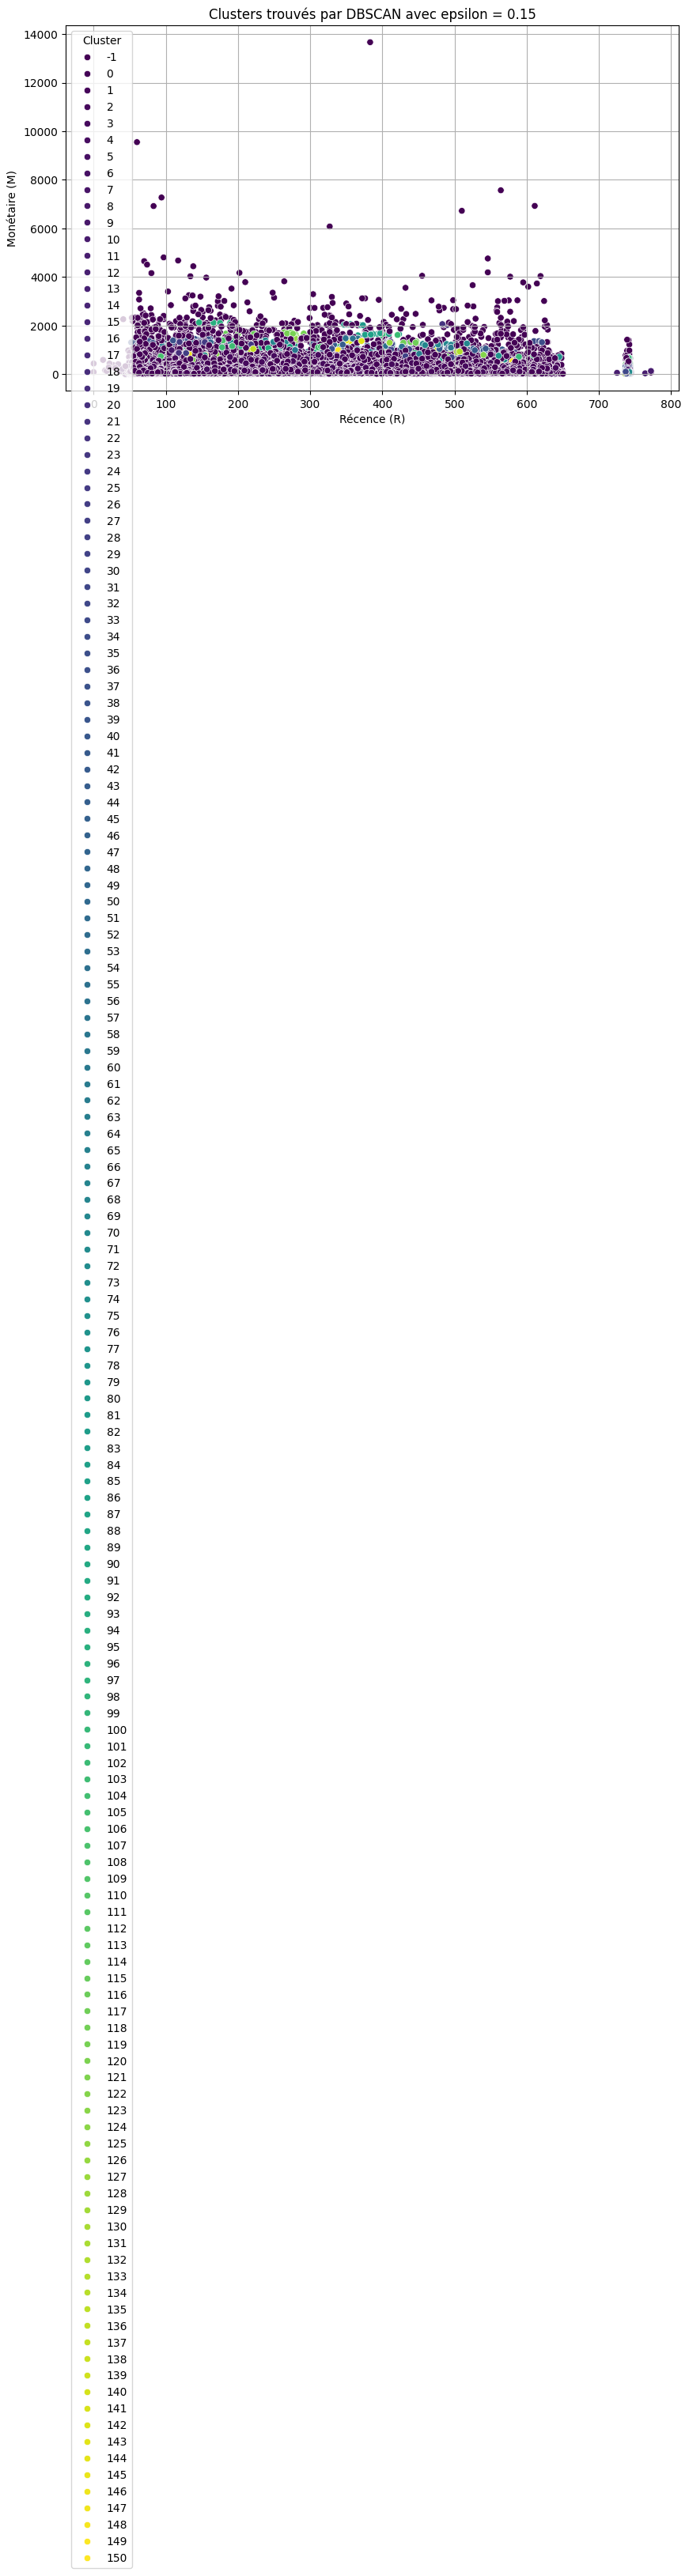

In [29]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Assurez-vous que les dates sont en format datetime
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'], errors='coerce')

# Fonction pour préparer les données RFM + review_score
def prepare_data(data):
    current_date = data['last_order'].max()
    data['last_order'] = pd.to_datetime(data['last_order'])
    data['recency'] = (current_date - data['last_order']).dt.days
    data['frequency'] = data['connection_days']
    data['monetary'] = data['total_spent']
    features = data[['recency', 'frequency', 'monetary', 'avg_review_score']]
    return features

# Préparer les données
features = prepare_data(customer_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
features = features.fillna(features.mean())

# Standard scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Utiliser la valeur epsilon identifiée
epsilon_optimal = 0.15

# Appliquer DBSCAN
dbscan = DBSCAN(eps=epsilon_optimal, min_samples=4)
dbscan.fit(features_scaled)

# Ajouter les étiquettes des clusters aux données
customer_data['Cluster'] = dbscan.labels_

# Afficher le nombre de points dans chaque cluster
print(customer_data['Cluster'].value_counts())

# Visualiser les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='monetary', hue='Cluster', data=customer_data, palette='viridis', legend='full')
plt.title('Clusters trouvés par DBSCAN avec epsilon = {}'.format(epsilon_optimal))
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.grid(True)
plt.show()

# En suivant le site suivant

https://digitaldwellings.tech/blog/article/47/

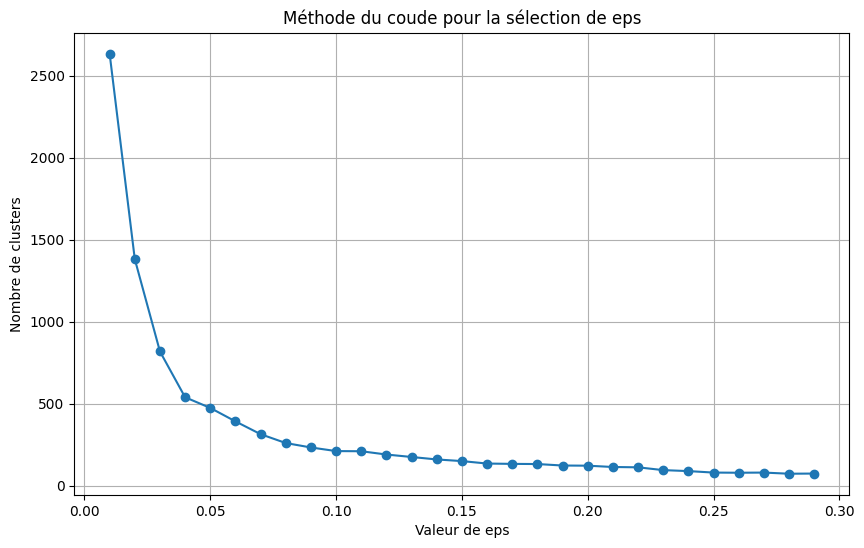

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Assurez-vous que les dates sont en format datetime
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'], errors='coerce')

# Fonction pour préparer les données RFM + review_score
def prepare_data(data):
    current_date = data['last_order'].max()
    data['last_order'] = pd.to_datetime(data['last_order'])
    data['recency'] = (current_date - data['last_order']).dt.days
    data['frequency'] = data['connection_days']
    data['monetary'] = data['total_spent']
    features = data[['recency', 'frequency', 'monetary', 'avg_review_score']]
    return features

# Préparer les données
features = prepare_data(customer_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
features = features.fillna(features.mean())

# Standard scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fonction pour tracer le graphe eps elbow
def plot_eps_elbow(data, min_eps=0.01, max_eps=0.3, step=0.01):
    eps_values = np.arange(min_eps, max_eps, step)
    num_clusters = []
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=4).fit(data)
        num_clusters.append(len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0))
    
    plt.figure(figsize=(10, 6))
    plt.plot(eps_values, num_clusters, 'o-')
    plt.title('Méthode du coude pour la sélection de eps')
    plt.xlabel('Valeur de eps')
    plt.ylabel('Nombre de clusters')
    plt.grid(True)
    plt.show()

# Tracer le graphe eps elbow pour les données RFM + review_score
plot_eps_elbow(features_scaled, min_eps=0.01, max_eps=0.3, step=0.01)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Assurez-vous que les dates sont en format datetime
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'], errors='coerce')

# Fonction pour préparer les données RFM + review_score
def prepare_data(data):
    current_date = data['last_order'].max()
    data['last_order'] = pd.to_datetime(data['last_order'])
    data['recency'] = (current_date - data['last_order']).dt.days
    data['frequency'] = data['connection_days']
    data['monetary'] = data['total_spent']
    features = data[['recency', 'frequency', 'monetary', 'avg_review_score']]
    return features

# Préparer les données
features = prepare_data(customer_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
features = features.fillna(features.mean())

# Standard scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fonction pour trouver la meilleure valeur de eps
def find_best_eps(data, min_eps=0.01, max_eps=0.3, step=0.01):
    best_score = -1
    best_eps = None
    for eps in np.arange(min_eps, max_eps, step):
        dbscan = DBSCAN(eps=eps, min_samples=4).fit(data)
        labels = dbscan.labels_
        if len(set(labels)) == 1 and -1 in labels:
            continue
        score = silhouette_score(data, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
    return best_eps, best_score

# Trouver la meilleure valeur de eps pour les données RFM + review_score
best_eps, best_score = find_best_eps(features_scaled, min_eps=0.05, max_eps=0.18, step=0.01)
print("Best eps:", best_eps)
print("Best silhouette score:", best_score)

Best eps: 0.12000000000000002
Best silhouette score: 0.0209781652458603


Cluster
0      52789
1      18226
3      10178
2       7345
4       2696
       ...  
152        3
175        3
82         3
170        3
159        3
Name: count, Length: 192, dtype: int64


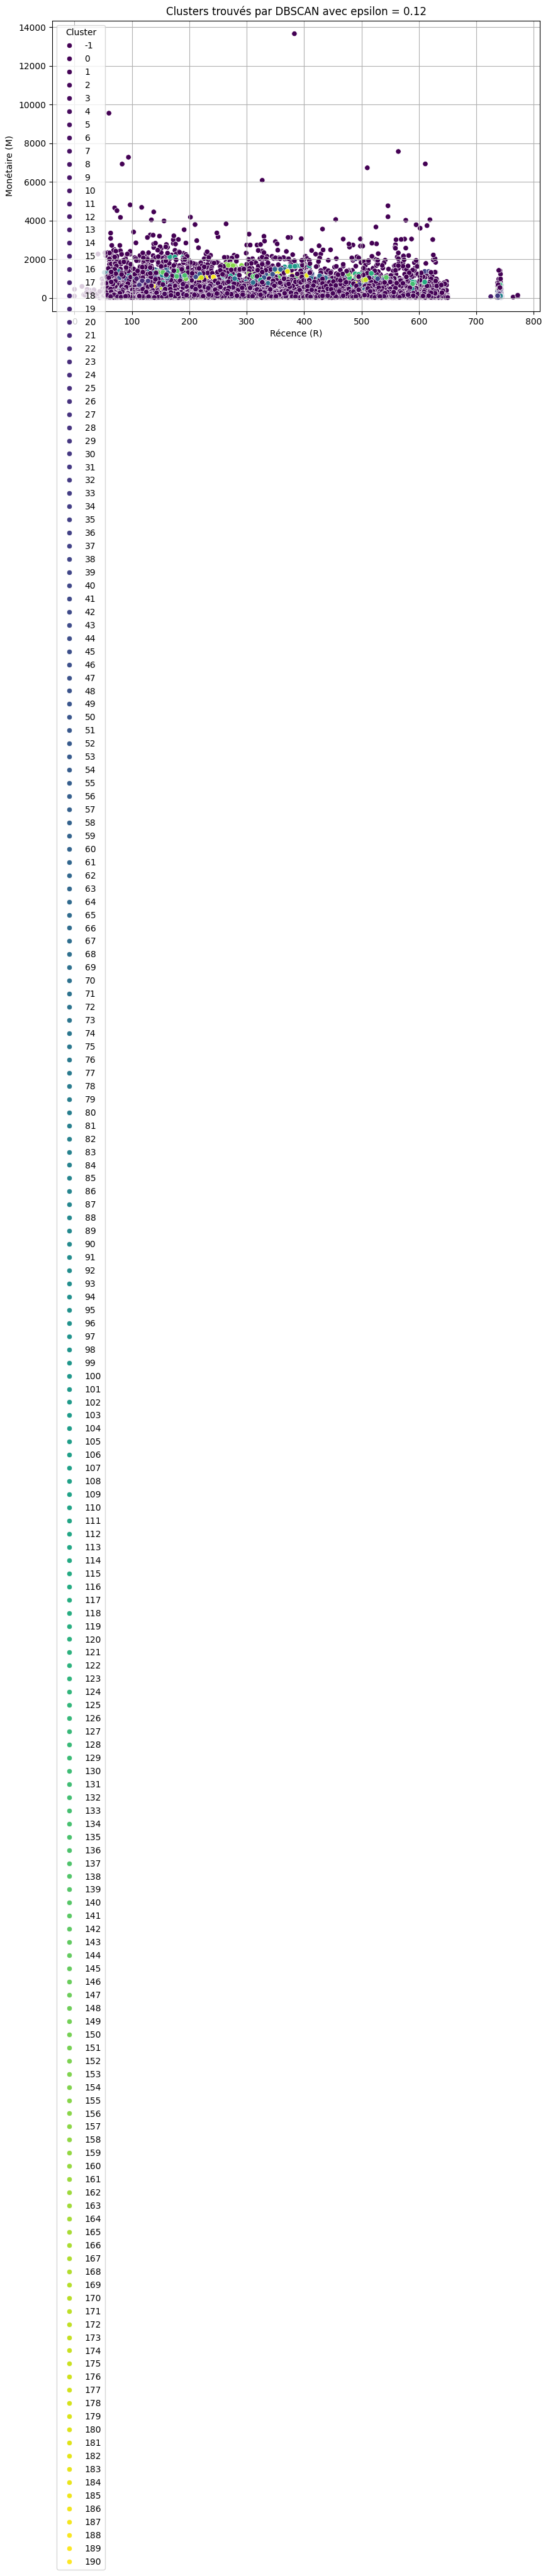

In [40]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
file_path = 'customer_details_v3.csv'  # Remplacez par le chemin correct
customer_data = pd.read_csv(file_path)

# Assurez-vous que les dates sont en format datetime
customer_data['last_order'] = pd.to_datetime(customer_data['last_order'], errors='coerce')

# Fonction pour préparer les données RFM + review_score
def prepare_data(data):
    current_date = data['last_order'].max()
    data['last_order'] = pd.to_datetime(data['last_order'])
    data['recency'] = (current_date - data['last_order']).dt.days
    data['frequency'] = data['connection_days']
    data['monetary'] = data['total_spent']
    features = data[['recency', 'frequency', 'monetary', 'avg_review_score']]
    return features

# Préparer les données
features = prepare_data(customer_data)

# Gérer les valeurs manquantes en les remplaçant par la moyenne de chaque colonne
features = features.fillna(features.mean())

# Standard scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Utiliser la valeur epsilon identifiée
epsilon_optimal = 0.12

# Appliquer DBSCAN
dbscan = DBSCAN(eps=epsilon_optimal, min_samples=4)
dbscan.fit(features_scaled)

# Ajouter les étiquettes des clusters aux données
customer_data['Cluster'] = dbscan.labels_

# Afficher le nombre de points dans chaque cluster
print(customer_data['Cluster'].value_counts())

# Visualiser les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='monetary', hue='Cluster', data=customer_data, palette='viridis', legend='full')
plt.title('Clusters trouvés par DBSCAN avec epsilon = {}'.format(epsilon_optimal))
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.grid(True)
plt.show()

In [41]:
# Identifier les 4 plus gros clusters
top_clusters = customer_data['Cluster'].value_counts().index[:4]

# Réétiqueter les clusters
customer_data['Cluster_Simplified'] = customer_data['Cluster'].apply(lambda x: x if x in top_clusters else -1)


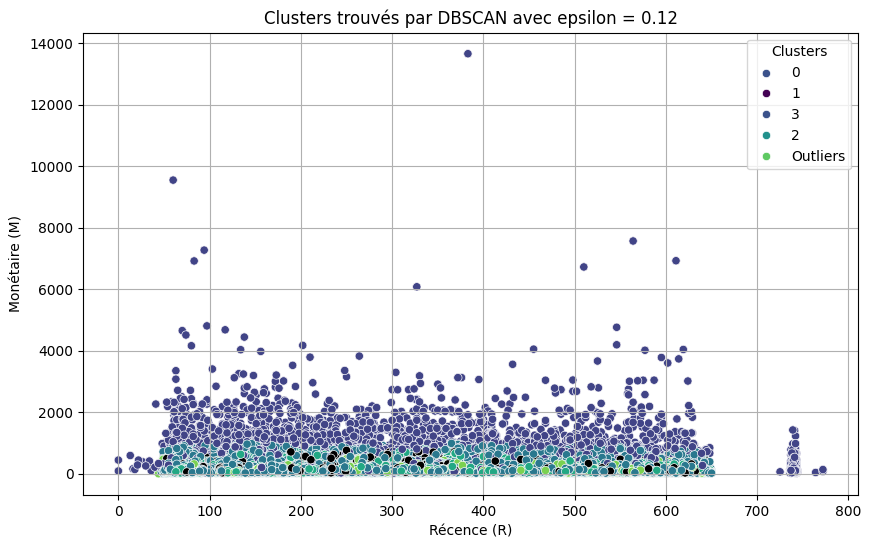

In [42]:
# Visualiser les clusters avec les outliers en noir
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='monetary', hue='Cluster_Simplified', data=customer_data, palette='viridis', legend='full')
plt.title('Clusters trouvés par DBSCAN avec epsilon = {}'.format(epsilon_optimal))
plt.xlabel('Récence (R)')
plt.ylabel('Monétaire (M)')
plt.grid(True)

# Afficher les outliers en noir
palette = sns.color_palette('viridis', n_colors=len(top_clusters))
palette.append((0, 0, 0))  # Ajouter le noir pour les outliers

# Visualiser les clusters avec une nouvelle palette de couleurs
sns.scatterplot(x='recency', y='monetary', hue='Cluster_Simplified', data=customer_data, palette=palette, legend='full')
plt.legend(title='Clusters', labels=[str(c) for c in top_clusters] + ['Outliers'])
plt.show()
